# Design practicum G-34
## Analysis of granular flow on experimental flume setup for different aspect ratios


In [1]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import image as img
from matplotlib import pyplot as plt

    Defining a function to extract frames from the video

In [2]:
import math
SEQUENCE_LENGTH = 40
def frames_extraction(video_path)0:
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frame=max(video_frames_count/SEQUENCE_LENGTH, 1)

    skip_frames_window = int(skip_frame)
    
    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read() 

        if not success:
            break

        normalized_frame = frame / 255
        frames_list.append(normalized_frame)
    
    video_reader.release()
    return frames_list, video_frames_count,skip_frames_window,skip_frame

    Extracting the frames from the videos

In [3]:
f_45,v,s,b=frames_extraction("gate1_camera/fine/fine_45.mp4")
f_30,v1,s1,b1=frames_extraction("gate1_camera/fine/fine_30.mp4")
f_22_5,v2,s2,b2=frames_extraction("gate1_camera/fine/fine_22_5.mp4")
f_15,v3,s3,b3=frames_extraction("gate1_camera/fine/fine_15.mp4")
f_7_5,v4,s4,b4=frames_extraction("gate1_camera/fine/fine_7_5.mp4")

In [4]:
r_45,v5,s5,b5=frames_extraction("gate1_camera/rough/rough_45.mp4")
r_30,v6,s6,b6=frames_extraction("gate1_camera/rough/rough_30.mp4")
r_22_5,v7,s7,b7=frames_extraction("gate1_camera/rough/rough_22_5.mp4")
r_15,v8,s8,b8=frames_extraction("gate1_camera/rough/rough_15.mp4")
r_7_5,v9,s9,b9=frames_extraction("gate1_camera/rough/rough_7_5.mp4")

    function to display frame

In [5]:
def display(image):
    plt.imshow(image)
    plt.show()

    Total frames in corresponding video

In [6]:
tot_frames=[v,v1,v2,v3,v4,v5,v6,v7,v8,v9]
print("Total frames in each video:")
print(tot_frames)


Total frames in each video:
[114, 135, 156, 149, 129, 177, 122, 102, 156, 135]


In [7]:
skip_wind=[s,s1,s2,s3,s4,s5,s6,s7,s8,s9]
print("Skip frame window for each video:")
print(skip_wind)


Skip frame window for each video:
[2, 3, 3, 3, 3, 4, 3, 2, 3, 3]


    Total frames extracted from corresponding video

In [8]:
videos=[f_45,f_30,f_22_5,f_15,f_7_5,r_45,r_30,r_22_5,r_15,r_7_5]

frame_vid=[]
for i in videos:
    frame_vid.append(len(i))
print("No of Frames extracted for each Video:")
print(frame_vid)

No of Frames extracted for each Video:
[40, 40, 40, 40, 37, 37, 36, 40, 40, 38]


    Defining functions to draw a horixontal and vertical line in frame 

In [9]:
def find_line(frame,cor):
    im=np.copy(frame)
    for i in range(800):
        for j in range(5):
            im[i,cor+j]=[1,0,0]
    display(im)
    
def find_hline(frame,cor):
    im=np.copy(frame)
    for i in range(400):
        for j in range(5):
            im[cor+j,i]=[1,0,0]
    display(im)

    Finding the cordinate for the vertical line where vertical velocity will be calculated 

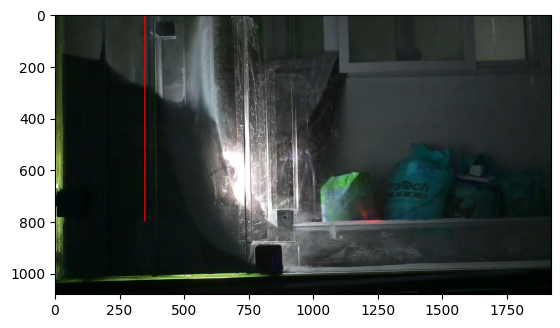

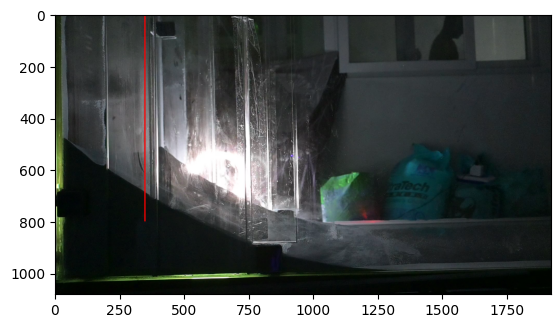

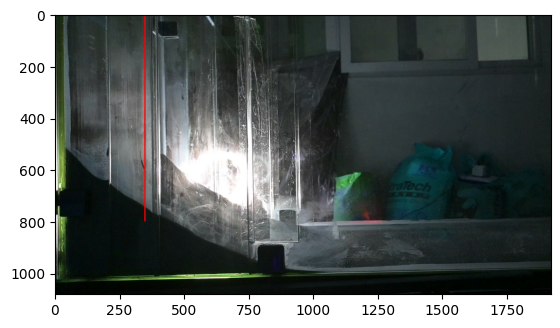

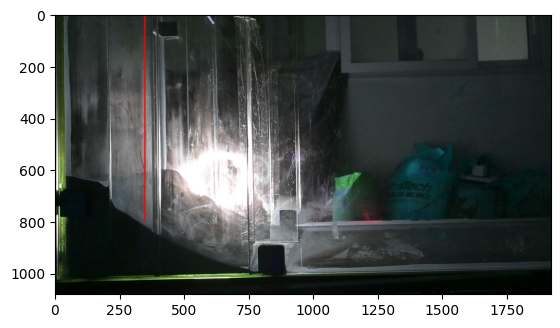

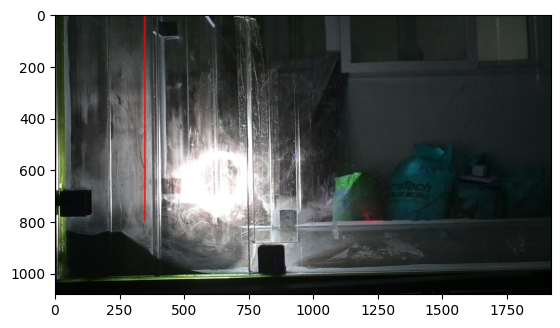

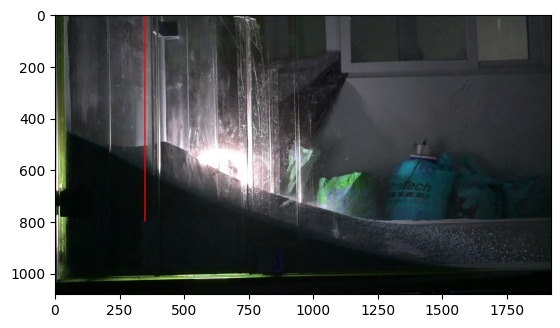

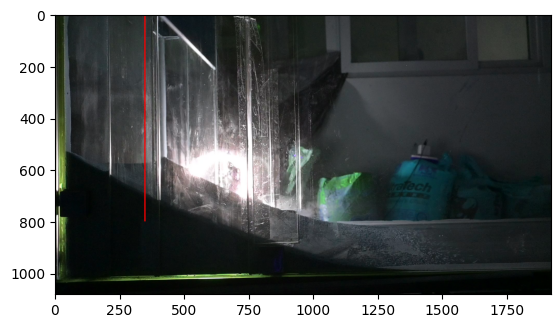

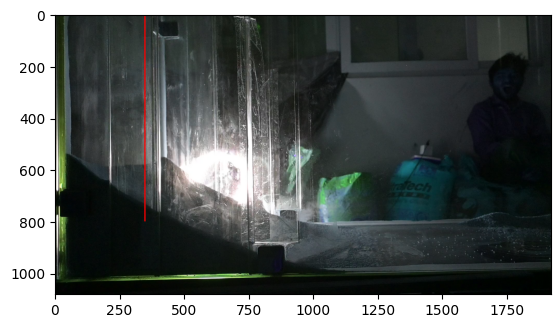

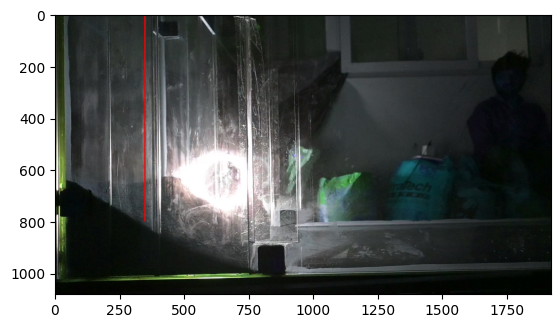

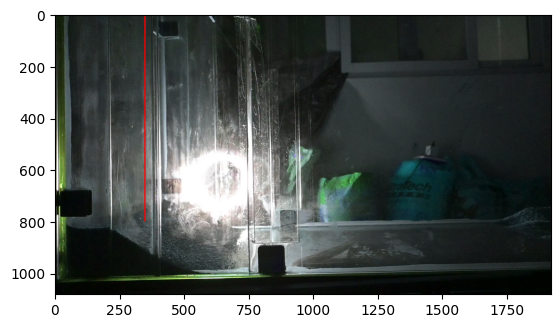

In [10]:
find_line(f_45[32],345)
find_line(f_30[32],345)
find_line(f_22_5[32],345)
find_line(f_15[32],345)
find_line(f_7_5[32],345)
find_line(r_45[32],345) 
find_line(r_30[32],345)
find_line(r_22_5[32],345)
find_line(r_15[32],345)
find_line(r_7_5[32],345)

    Finding the cordinate for the horizontal line where horizontal velocity will be calculated 

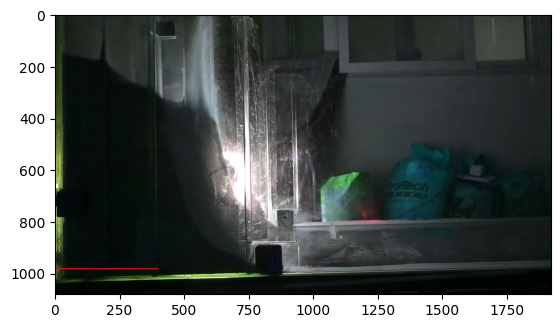

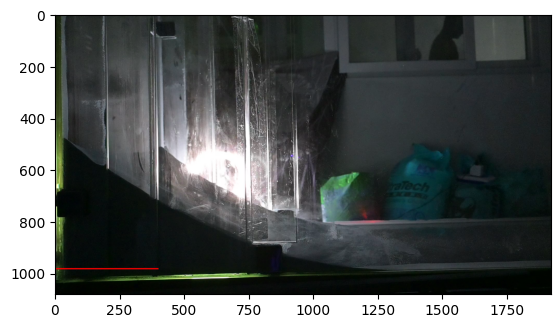

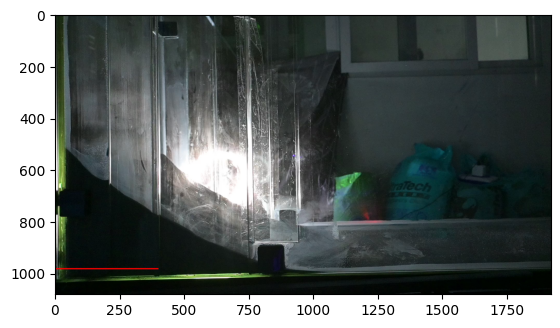

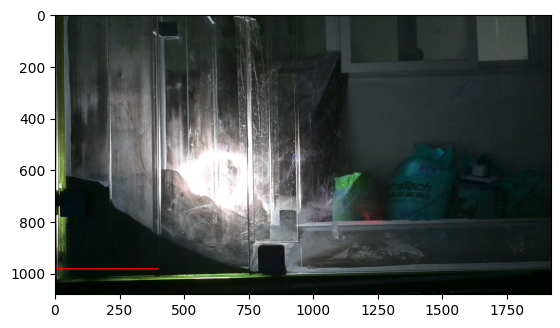

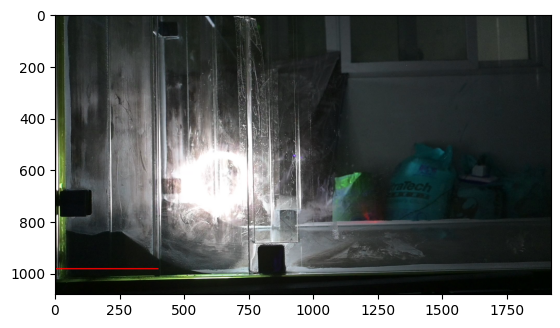

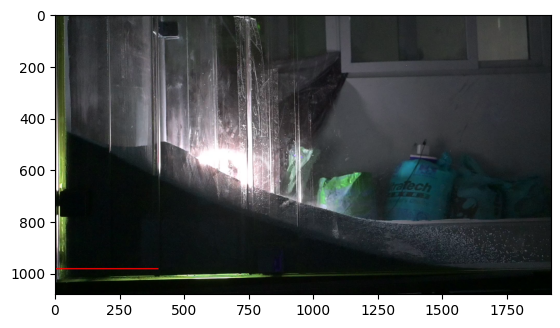

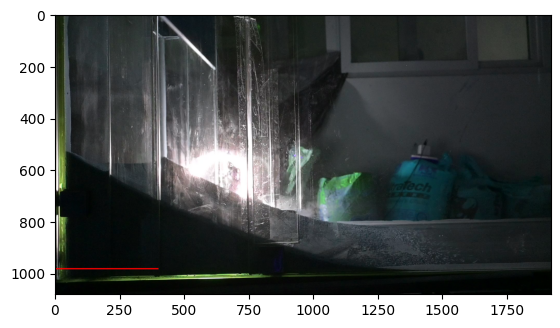

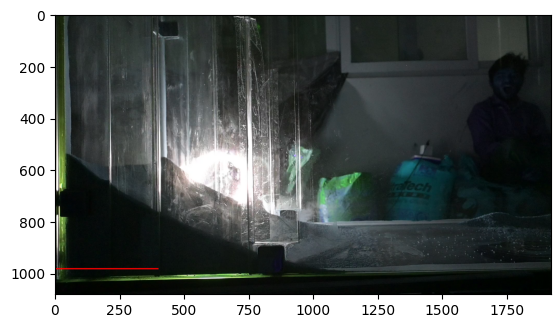

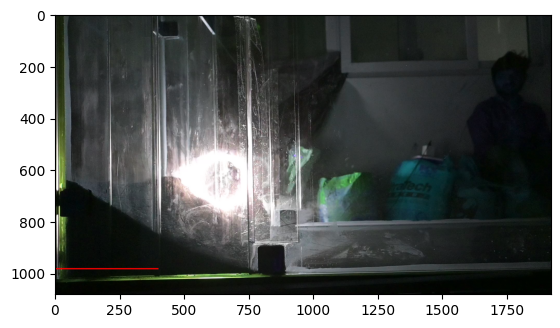

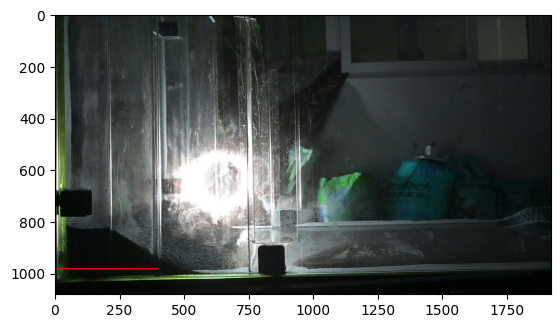

In [11]:
find_hline(f_45[32],980)
find_hline(f_30[32],980)
find_hline(f_22_5[32],980)
find_hline(f_15[32],980)
find_hline(f_7_5[32],980)
find_hline(r_45[32],980)
find_hline(r_30[32],980)
find_hline(r_22_5[32],980)
find_hline(r_15[32],980)
find_hline(r_7_5[32],980)

    Find pixel per length 

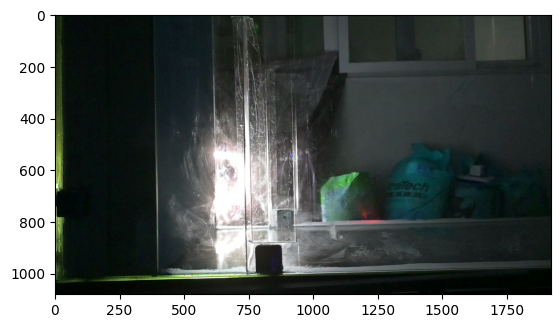

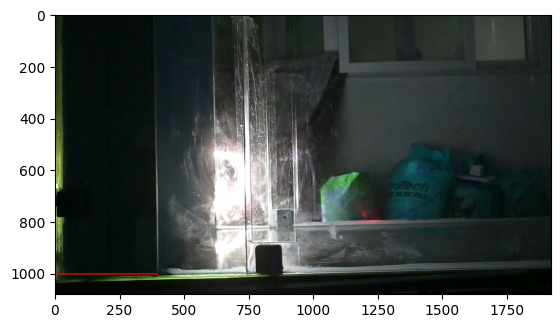

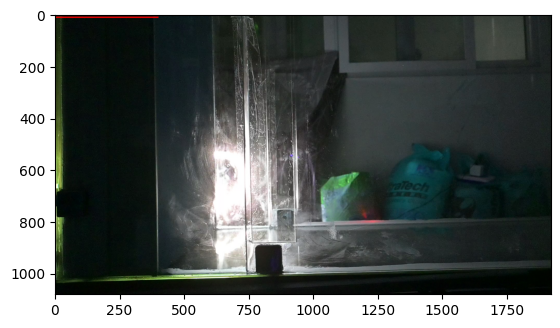

The length one pixel covers 0.45 mm


In [12]:
display(f_45[1])
find_hline(f_45[1],1000)
find_hline(f_45[1],10)
print("The length one pixel covers", 450/1000,"mm")

    Defining function to find the vertical and horizontal distance
#### Function that travels on a particular coordinate to find the pixels with high RGB so we can find the pixels where the sand has not travelled and get a list of all the coordinates of all frames in videos till where the sand has travelled 

In [13]:
def hrpixel(frame):
    for i in range(1800):
        k=0
        for j in frame[980][50+i]:
            if j>0.13 :
                k+=1
        if(k==3) :
            return 50+i
        
def vrpixel(frame):
    p=970
    while(p>=0):
        k=0
        for j in frame[p][345]:
            if j>0.12 :
                k+=1
        if(k==3) :
            return p
        p-=1
    return 0
        
def vdist(frames):
    dist=[]
    for frame in frames:
        k=vrpixel(frame)
        dist.append(vrpixel(frame))
    return dist

def hdist(frames):
    dist=[]
    for frame in frames:
        dist.append(hrpixel(frame))
    return dist

    using different pixel intensities for 45 cm height to adjust for experimental error

In [14]:
def hrpixel_0(frame):
    for i in range(1800):
        k=0
        for j in frame[980][50+i]:
            if j>0.13 :
                k+=1
        if(k==3) :
            return 50+i
def hdist_0(frames):
    dist=[]
    for frame in frames:
        dist.append(hrpixel(frame))
    return dist


In [15]:
def vrpixel_0(frame):
    p=970
    while(p>=0):
        k=0
        for j in frame[p][340]:
            if j>0.12 :
                k+=1
        if(k==3) :
            return p
        p-=1
    return 0

def vdist_0(frames):
    dist=[]
    for frame in frames:
        k=vrpixel_0(frame)        
        dist.append(k)
    # print(dist)
    return dist

    Defined a function to find the time difference between frames 

#### the function makes a list noting the time at which the frame is extracted by taking the gap between the frames being  skip window(frames between 2 extracted frames)/60(frames oer second) 

In [16]:
def time_list(frame_vid,ind,skip_wind):
    time_axis=[]
    for i in range(frame_vid[ind]):
        time_fr=((i*skip_wind[ind])+1)/60
        time_axis.append(time_fr)
    return time_axis

In [17]:
def preprocess(l1,l2,l3):
    l1_upd=[]
    l2_upd=[]
    l3_upd=[]
    for i in range(len(l1)):
        if l1[i]==0:
            continue
        else:
            l1_upd.append(l1[i])
            l2_upd.append(l2[i])
            l3_upd.append(l3[i])
    return l1_upd,l2_upd,l3_upd


In [18]:
def xt(videos,ind,frame_vid,skip_wind):
    if(ind==0):
        kk_v=vdist_0(videos[ind])
    else:
        kk_v=vdist(videos[ind])
    kk_h=hdist(videos[ind])
    time_axis=time_list(frame_vid,ind,skip_wind)

    dis_v,time_ax,dis_h=preprocess(kk_v,time_axis,kk_h)
    return dis_v,dis_h,time_ax

    Preprocessing the experimental data

In [19]:
def helper(vel,time):
    m=0
    ind=0
    for i in range(len(vel)):
        if(vel[i]>m):
            m=vel[i]
            ind =i
    prev=0
    upd_vel=[]
    upd_time=[]
    for i in range(len(vel)):
        if vel[i]==0:
            continue
        elif i<=ind:
            if vel[i]>prev and vel[i]>=0:
                upd_vel.append(vel[i])
                upd_time.append(time[i])
        else:
            if vel[i]<prev and vel[i]>=0:
                upd_vel.append(vel[i])
                upd_time.append(time[i])
        prev=vel[i]
    return upd_vel,upd_time

In [20]:
def plot_vt_fine(x_values, t_values,typ,i,vid):
    delta_x = [x_values[i+1] - x_values[i] for i in range(len(x_values)-1)]
    delta_t = [t_values[i+1] - t_values[i] for i in range(len(t_values)-1)]
    velocity = [delta_x[i]*(0.045)/ delta_t[i] for i in range(len(delta_x))]
    vel,time=helper(velocity,t_values)
    plt.plot(time,vel, label=str(vid[i]))
    plt.xlabel('Time(s)')
    plt.ylabel('Velocity(cm/s)')    
    plt.title('V-t graph in '+str(typ)+" direction")


In [21]:
def plot_vt_rough(x_values, t_values,typ,i,vid):
    delta_x = [x_values[i+1] - x_values[i] for i in range(len(x_values)-1)]

    delta_t = [t_values[i+1] - t_values[i] for i in range(len(t_values)-1)]

    velocity = [delta_x[i]*(0.045)/ delta_t[i] for i in range(len(delta_x))]

    vel,time=helper(velocity,t_values)

    plt.plot(time,vel, label=str(vid[i]))
    plt.xlabel('Time(s)')
    plt.ylabel('Velocity(cm/s)')
    plt.title('V-t graph in '+str(typ)+" direction")

In [22]:
def all_plots(videos,ind,frame_vid,skip_wind,vid):
    dis_v,dis_h,time_ax=xt(videos,ind,frame_vid,skip_wind)
    if(ind<5):
        plot_vt_fine(dis_v,time_ax,"Vertical",ind,vid)
    else:
        plot_vt_rough(dis_v,time_ax,"Vertical",ind,vid)

    Plotting the graph for fine sand 

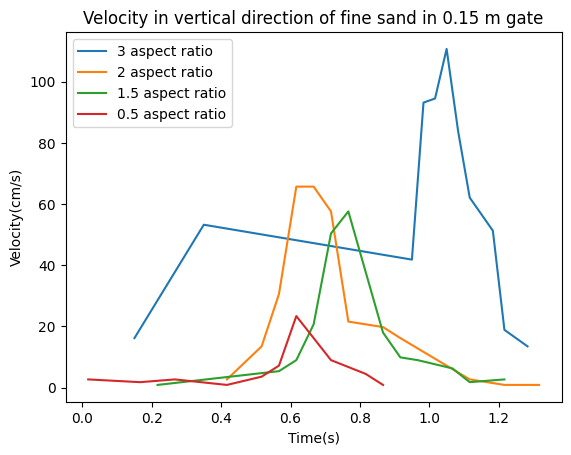

In [93]:
vid=['3 aspect ratio','2 aspect ratio','1.5 aspect ratio','f_15','0.5 aspect ratio','3 aspect ratio','2 aspect ratio',' 1.5 aspect ratio','f_15','0.5 aspect ratio']
for i in range(5):  
    if(i!=3):
        all_plots(videos,i,frame_vid,skip_wind,vid)
plt.legend()
plt.title("Velocity in vertical direction of fine sand in 0.15 m gate")
plt.savefig("graph1.png")
plt.show()

    Plotting the graph for coarse sand 

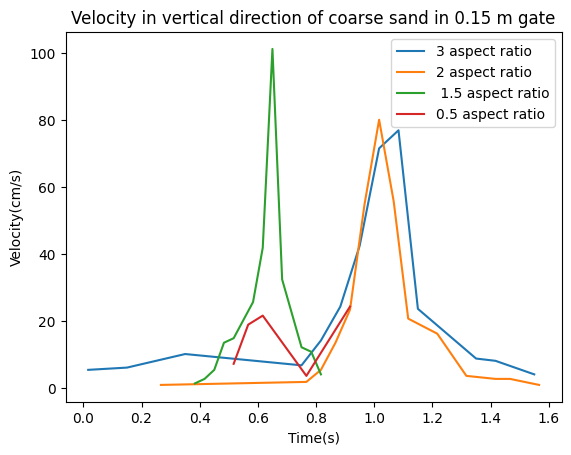

In [92]:
# vid=['f_45','f_30','f_22.5','f_15','f7',"r45","r30","r22","r15","r7"]
vid=['3 aspect ratio','2 aspect ratio','1.5 aspect ratio','f_15','0.5 aspect ratio','3 aspect ratio','2 aspect ratio',' 1.5 aspect ratio','f_15','0.5 aspect ratio']
for i in range(5,len(vid)):
    if(i!=8):
        all_plots(videos,i,frame_vid,skip_wind,vid)
plt.legend()
plt.title("Velocity in vertical direction of coarse sand in 0.15 m gate")
plt.savefig("graph2.png")
plt.show()

In [25]:
def vel_calculate(x_values, t_values):
    delta_x = [x_values[i+1] - x_values[i] for i in range(len(x_values)-1)]
    delta_t = [t_values[i+1] - t_values[i] for i in range(len(t_values)-1)]
    velocity = [delta_x[i]*(0.045)/ delta_t[i] for i in range(len(delta_x))]
    vel,time=helper(velocity,t_values)
    return vel

In [26]:
def vel_find(videos,ind,frame_vid,skip_wind):
    dis_v,dis_h,time_ax=xt(videos,ind,frame_vid,skip_wind)
    vel_v=vel_calculate(dis_v,time_ax)
    vel_h=vel_calculate(dis_h,time_ax)
    return vel_v,vel_h

    Finding the average velocities

In [27]:
vel_v=[]
vel_h=[]
for i in range(10):
        if(i!=3 and i!=8):
                t,z=vel_find(videos,i,frame_vid,skip_wind)
                vel_v.append(t)
                vel_h.append(z)
avg_vel_v=[]
for i in vel_v:
        avg_vel_v.append(np.average(i))
print(avg_vel_v)

avg_vel_h=[]
for i in vel_h:
        avg_vel_h.append(np.average(i))
print(avg_vel_h)

[58.10454545454547, 23.538461538461533, 17.653846153846153, 6.627272727272728, 23.261538461538464, 20.18571428571428, 22.162500000000005, 15.12]
[92.81024999999997, 49.01538461538463, 51.12, 30.299999999999983, 63.28124999999997, 64.1454545454545, 63.99000000000002, 46.61999999999999]


    Finding the max velocities


In [28]:
max_vel_v=[]
for i in vel_v:
        max_vel_v.append(np.max(i))
print(max_vel_v)

max_vel_h=[]
for i in vel_h:
        max_vel_h.append(np.max(i))
print(max_vel_h)


[110.70000000000039, 65.70000000000009, 57.60000000000007, 23.40000000000003, 76.95000000000002, 80.09999999999992, 101.25000000000003, 24.299999999999976]
[188.9999999999994, 144.9000000000002, 140.39999999999986, 49.49999999999996, 128.24999999999957, 174.59999999999985, 160.65000000000003, 86.39999999999993]


In [95]:
def plot_bar1(list1, list2,labels,t):
    if labels is None:
        labels = [str(i) for i in range(1, min(len(list1), len(list2)) + 1)]
    
    x = range(len(labels))
    
    plt.bar(x, list1, width=0.4, align='center', label='Fine sand')
    plt.bar(x, list2, width=0.4, align='edge', label='coarse sand')
    
    plt.ylabel('velocity(cm/s)')
    plt.title(t)
    plt.xticks(x, labels)
    plt.legend()
    plt.show()

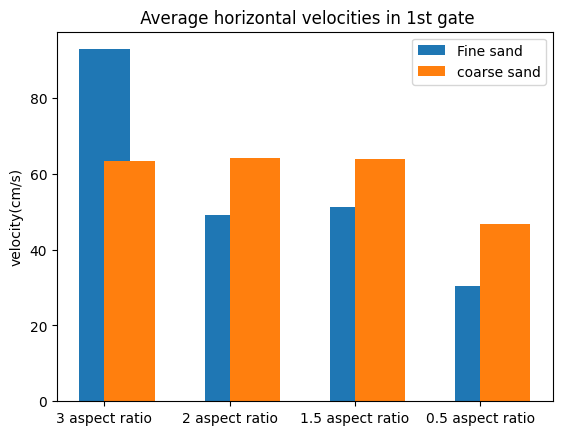

In [96]:
vid_upd=['3 aspect ratio','2 aspect ratio','1.5 aspect ratio','0.5 aspect ratio']
plot_bar1(avg_vel_h[0:4],avg_vel_h[4:len(avg_vel_h)] ,vid_upd," Average horizontal velocities in 1st gate")
plt.show()

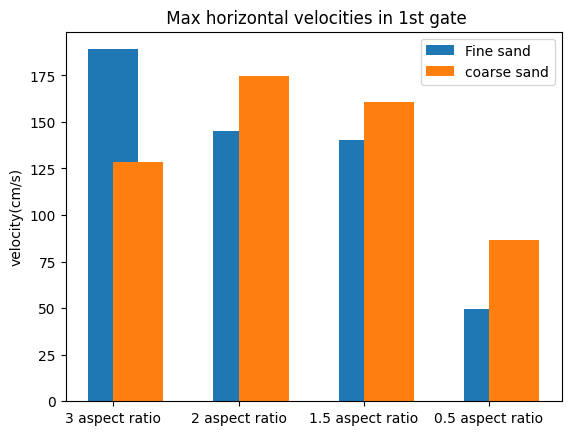

<Figure size 640x480 with 0 Axes>

In [97]:
vid_upd=['3 aspect ratio','2 aspect ratio','1.5 aspect ratio','0.5 aspect ratio']
plot_bar1(max_vel_h[0:4],max_vel_h[4:len(max_vel_h)] ,vid_upd," Max horizontal velocities in 1st gate")
plt.savefig("max_1stgate")

In [98]:
import pandas as pd
k_v=[]
k_v.append(avg_vel_v[2])
k_v.append(avg_vel_v[3])
k_v.append(avg_vel_v[6])
k_v.append(avg_vel_v[7])

k_h=[]
k_h.append(avg_vel_h[2])
k_h.append(avg_vel_h[3])
k_h.append(avg_vel_h[6])
k_h.append(avg_vel_h[7])

df = pd.DataFrame(k_h)
df.to_csv('k_h.csv', index=False)

df = pd.DataFrame(k_v)
df.to_csv('k_v.csv', index=False)

print(k_h)

[51.12, 30.299999999999983, 63.99000000000002, 46.61999999999999]
